# [AI 이노베이션 스퀘어] 11기 기본 저녁반
- github: https://github.com/hysKim1/AI_Fundamental
    -  [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
---
* [1.전처리에 따른 검정결과 변화 ](#검정) <br>
     *  [1.1 Holdout](#KMeans)
         * [ 2 way](#2-way)<br>
         * [ 3 way](#3-way)<br>
     *  [1.2  검정 그래프 ](#검정-그래프)
          * [learning_curve](#learning_curve)<br>
          * [sklearn_evaluation](#sklearn_evaluation)<br>
* [2. 자동화](#자동화) <br>
     *  [2.1 Pipeline](#Pipeline)
     *  [2.2 GridSearchCV ](#GridSearchCV)
         * [ 1.하이퍼파라미터 비교](#1.하이퍼파라미터 비교)<br>
         * [ 2.전처리와 모델](#2.전처리와 모델)<br>
         * [ 3.모델 비교](#3.모델 비교)<br>
         * [ 4.하이퍼 파라미터 조합 비교](#4.하이퍼 파라미터 조합 비교)<br>
     *  [2.2 고급기법: GridSearchCV & Pipeline ](# GridSearchCV & Pipeline)
* [3. Feature Seleciton ](# feature seleciton) <br>
     *  [3.1 filter](#1.filter)
         * [ chi2](#chi2)<br>
         * [ SelectKBest](#SelectKBest)<br>
     *  [3.2 wrapper ](#2.wrapper)
          * [RFE](#RFE)<br>
          * [RFECV](#RFECV)<br>
     *  [3.2 embeded ](#2.embeded)
          * [feature_importances_](#feature_importances_)<br>

In [5]:
import seaborn as sns
import inspect
import numpy as np
import pandas as pd

sklearn, seaborn외에 온라인 레포지토리(git hub)에 저장된 데이터 세트를 가져올 수 있음.

 - link : https://github.com/mwaskom/seaborn
 
 * `inspect.getsource(sns.load_dataset)`통해서 어떤 데이터 세트가 있는지 알수 있음.

In [2]:
#data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/raw/attention.csv')

In [3]:
print( inspect.getsource(sns.load_dataset)) 

def load_dataset(name, cache=True, data_home=None, **kws):
    """Load a dataset from the online repository (requires internet).

    Parameters
    ----------
    name : str
        Name of the dataset (`name`.csv on
        https://github.com/mwaskom/seaborn-data).  You can obtain list of
        available datasets using :func:`get_dataset_names`
    cache : boolean, optional
        If True, then cache data locally and use the cache on subsequent calls
    data_home : string, optional
        The directory in which to cache data. By default, uses ~/seaborn-data/
    kws : dict, optional
        Passed to pandas.read_csv

    """
    path = ("https://raw.githubusercontent.com/"
            "mwaskom/seaborn-data/master/{}.csv")
    full_path = path.format(name)

    if cache:
        cache_path = os.path.join(get_data_home(data_home),
                                  os.path.basename(full_path))
        if not os.path.exists(cache_path):
            urlretrieve(full_path, cache_path)

원하는 데이터 세트가 없어서 scikitlearn의 데이터 세트 이용

In [6]:
from sklearn.datasets import load_wine

wine 데이터를 가져와서 pandas의 DataFrame으로 만듦.
- features,와 target을 하나의 DataFrame으로 합침.

In [7]:
data= load_wine()

In [8]:
wine= pd.DataFrame(data.data , columns=data.feature_names)

In [9]:
wine['target']=data.target

In [10]:
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


13개의 dimension으로 이루어졌고 모든 데이터 타입은 수치형(float, int)

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

<AxesSubplot:>

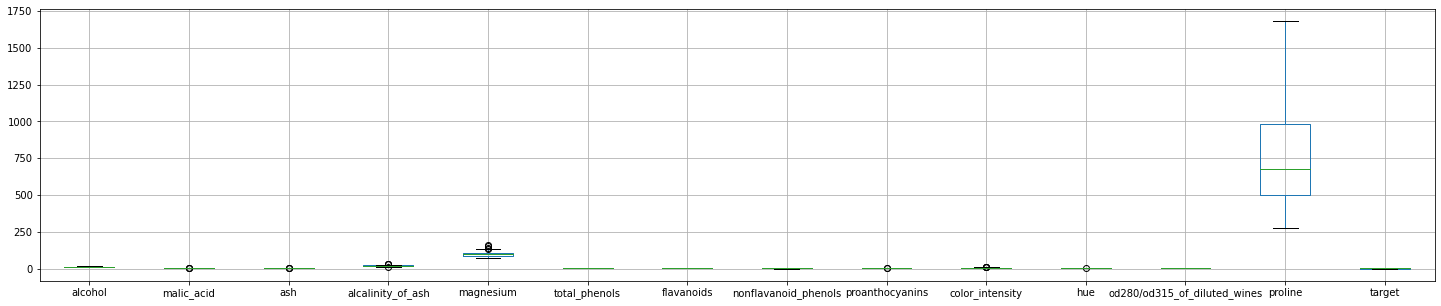

In [12]:
wine.boxplot(figsize=(25,5))

<AxesSubplot:>

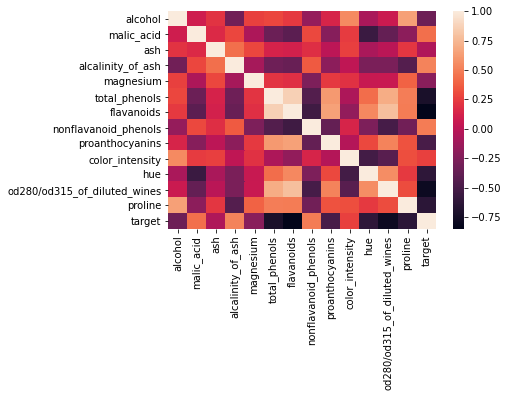

In [7]:
sns.heatmap(wine.corr())

> ### No Free Lunch
    - 모든 데이터에 만능인 알고리즘 없다
- 지금까지 각 모델과 하이퍼 파라미터 변경하여서 성능을 향상 시키려함
- 특정 사항에 맞는 평가 기준에 맞는것은 찾아야함


학습 한번한 데이터를 다시 학습시키면 성능은 좋은 (과대적합)
- 학습시킨 데이터를 성능 평가를 하기 위해서 학습하지 않은 새로운 데이터에 해야함
    - Holdout :train_test_split
    - cross_val_score

[2020/08/03 수업](https://github.com/hysKim1/AI_Fundamental/blob/master/200803_11기_기본저녁반_필기.ipynb )에 위의 wine data에 대해서 자세히 소개 되었음.

---
표준화된 데이터와 아닌 데이터의 성능 비교 

In [8]:
from sklearn.preprocessing import StandardScaler     #전처리:표준화
from sklearn.model_selection import train_test_split #holdout
from sklearn.neighbors import KNeighborsClassifier   #estimator

In [9]:
ss=StandardScaler()       #인스턴스

### Holdout
- train_test_split
- 학습된 데이터가 다른 데이터에서도  제대로 작동하는지 검정 
    - 2way: train, test
    - 3way: train, test, validation 
        - train, validation으로 하이퍼 파라미터를 찾고,test로 성능 확인.
   - validation: 하이퍼 파라미터 사용했던 데이터이기 때문에 최종 성능평가용으로 부적절

#### 2 way

1.train,test 로 분할

In [10]:
X_train,X_test, y_train, y_test= train_test_split(wine.iloc[:,:-1],wine.target)

#### 3 way

1. train,test 로 분할
2. test데이터를 다시 특정 사이즈(비율)를 정하여 test,validation으로 분할

In [11]:
X_train,X_test, y_train, y_test= train_test_split(wine.iloc[:,:-1],wine.target)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5)

--- 
전처리 여부에 따른 검정 결과 비교
- wine: 원래 wine 데이터
    -  knn알고리즘에서 약 0.67의 정확도를 보임

In [15]:
X_train,X_test, y_train, y_test= train_test_split(wine.iloc[:,:-1],wine.target)

In [16]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [17]:
knn.score(X_test,y_test)

0.6666666666666666

- wine2 : wine 데이터를 표준화한 데이터
    - knn알고리즘에서 1.0의 정확도를 보임
    - 표준화를 통해 성능이 월등히 올라감.

In [12]:
wine2=wine.copy()    #와인데이터의 DataFrame copy

In [23]:
wine2.iloc[:,:-1]=ss.fit_transform(wine.iloc[:,:-1])

In [24]:
X_train,X_test, y_train, y_test= train_test_split(wine2.iloc[:,:-1],wine2.target)

In [25]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [26]:
knn.score(X_test,y_test)

1.0

표준화된 데이터와 원래 데이터의 분포 비교

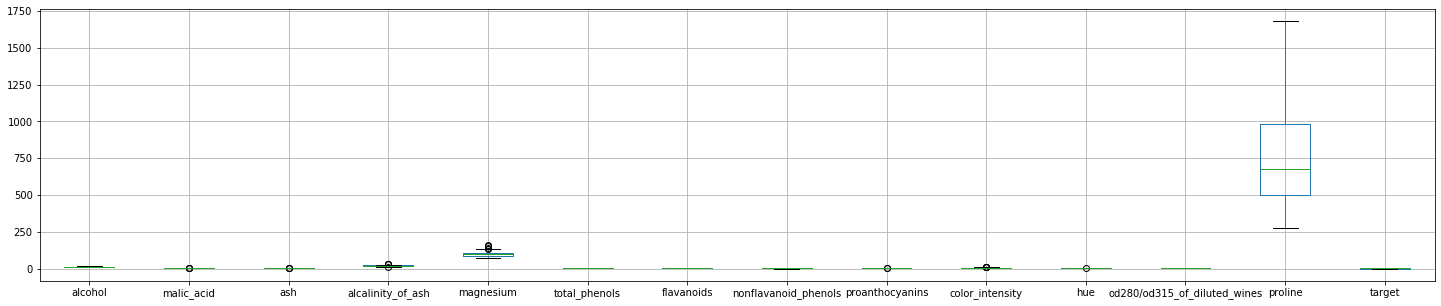

In [28]:
wine.boxplot(figsize=(25,5)) #original :분포 차이가 심함.(영향력 차이 발생)

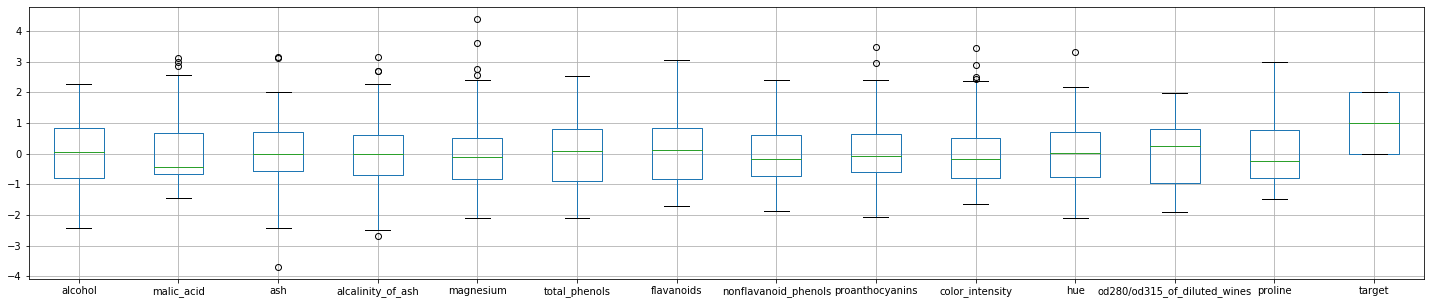

In [29]:
wine2.boxplot(figsize=(25,5)) #표준화 :분포 차이가 크지 않고 0 에서 가장 많이 나타남.

### cross_val_score
데이터가 차원에 비해 적은 경우 holdout 방식은 큰 도움이 되지 않아 교차 검정을 함

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score

표준화된 데이터와 원래 데이터간의 교차검정 비교

In [31]:
cross_val_score(KNeighborsClassifier(5),wine.iloc[:,:-1],wine.target,cv=10)

array([0.66666667, 0.66666667, 0.61111111, 0.61111111, 0.61111111,
       0.61111111, 0.72222222, 0.66666667, 0.82352941, 0.76470588])

In [32]:
cross_val_score(KNeighborsClassifier(10),wine2.iloc[:,:-1],wine2.target,cv=10)

array([0.94444444, 0.94444444, 0.94444444, 0.94444444, 1.        ,
       0.94444444, 1.        , 1.        , 0.94117647, 1.        ])

### 검정 그래프
- 모델들을 검정하기 위해서 데이터 양에 따라 training , validation 검정값을 그래프로 표현 
- bias(편향)에러나 variance(분산)에러로부터 모델이 얼마나 영향을 받는지 봄

    - 오버 피팅 : 데이터 많을수록 성능 떨어짐
    -  플라토현상 올떄까지 데이터 수집
- https://scikit-learn.org/stable/modules/learning_curve.html

### learning_curve
적정 데이터 양 확인하는 방법으로 각 데이터양에 따라 `cross_validation_score(cv=5)` 수행한 평균, 표준편차 값을 array형태로 보여줌 

In [50]:
from sklearn.model_selection import learning_curve

array 가 여러개인경우 unpacking 으로 분할 가능

In [259]:
learning_curve(KNeighborsClassifier(),wine.iloc[:,:-1],wine.target)

(array([ 14,  46,  78, 110, 142]),
 array([[1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [0.93589744, 0.93589744, 0.91025641, 0.93589744, 0.91025641],
        [0.9       , 0.9       , 0.88181818, 0.89090909, 0.87272727],
        [0.8028169 , 0.78873239, 0.8028169 , 0.78169014, 0.73943662]]),
 array([[0.33333333, 0.33333333, 0.33333333, 0.34285714, 0.31428571],
        [0.33333333, 0.33333333, 0.33333333, 0.34285714, 0.31428571],
        [0.63888889, 0.63888889, 0.69444444, 0.71428571, 0.74285714],
        [0.63888889, 0.63888889, 0.69444444, 0.71428571, 0.74285714],
        [0.72222222, 0.66666667, 0.63888889, 0.65714286, 0.74285714]]))

### sklearn_evaluation
- 위의 `learning_curve` 의 각 array값을 시각화하여 시각적 이해 높임
- `sklearn_evaluation.plot.learning_curve(train_score, test_score,train_size)` 
   

`-` 설치
`_ `사용

In [48]:
#!pip install sklearn-evaluation
import sklearn_evaluation

In [270]:
dir(sklearn_evaluation)

['ClassifierEvaluator',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'compute',
 'evaluator',
 'metrics',
 'plot',
 'preprocessing',
 'report',
 'util',
 'validate']

learning_curve에서 계산된 데이터 양에 따른 평균, 표준편차값을 담은 3개의 array분할

In [260]:
len(learning_curve(KNeighborsClassifier(),wine.iloc[:,:-1],wine.target))

3

In [262]:
train_size,train_score,test_score= learning_curve(KNeighborsClassifier(),wine.iloc[:,:-1],wine.target)

- x축: 데이터의 개수
- y축: 각 평가 지표의 평균
    - 데이터가 많아질 수록 성능이 높아지는 양상을 보인다.(우상향 그래프)
- Training score(붉은색): 모델이 학습한 데이터로 평가
- Cross-validation score(녹색): 모델이 학습 안한 데이터로 평가
    - line graph에서 범위로 색상이 칠해진 부분 :  오차범위 (편차)

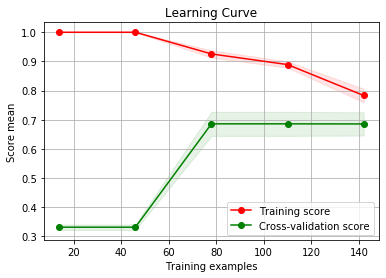

In [271]:
sklearn_evaluation.plot.learning_curve(train_score, test_score,train_size)

위의 그래프에서 두 그래프는 데이터가 늘어날수록 약 꽤 낮은 검정값으로 수렴함

 - training data는 overfiting 될 가능성 높음.
      - train 데이터에 과대적함되고 test 데이터에서는 낮은 점수를 보임

In [51]:
train_size,train_score,test_score= learning_curve(pipe,
                                                  wine.iloc[:,:-1],wine.target
                                                 , train_sizes=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

wine 데이터를 파이프를 이용하여 전처리 하게 되면 cross-validaiton score(교차 검정)결과가 향상됨.
- 동일한 데이터임에 전처리하니 두 그래프는 데이터가 늘어날수록 높은 검정값으로 수렴함
    -   일반화(generalization) 향상됨

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score mean'>

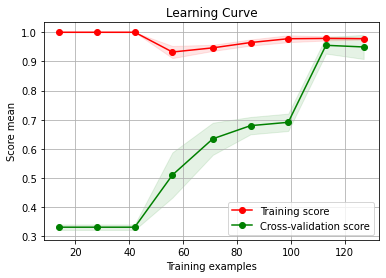

In [52]:
sklearn_evaluation.plot.learning_curve(train_score, test_score,train_size)

--- 
### 자동화

### Pipeline
> 복습
   - 전처리부터 학습을 이어주어 한번에 처리해주는 편리한 기능
    - 데이터 전처리,학습 하는 과정을 한번에 할 수 있고 전체 데이터에 적용됨
    - structured araay 형태로 넣어 순서대로 실행
        - `Pipeline([( 지정 이름, 인스턴스화한 객체   )])`
    - 마지막에 estimator 넣어야함

[이전 필기 참고](https://github.com/hysKim1/AI_Fundamental/blob/master/200804_11%EA%B8%B0_%EA%B8%B0%EB%B3%B8%EC%A0%80%EB%85%81%EB%B0%98_%ED%95%84%EA%B8%B0.ipynb)
- `Pipeline`, `make_pipeline`, `ColumnTransforme`
- 파이프라인 +gridsearch_CV를 동시에 사용하면 자동화하여 모델 비교를  막강함.

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

단 두줄로 요약 가능
- structured araay 형태

In [13]:
pipe=Pipeline([('ss',StandardScaler()),('knn',KNeighborsClassifier())])
pipe.fit(wine.iloc[:,:-1], wine.target)

Pipeline(memory=None,
         steps=[('ss',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

각 스텝과 하이퍼 파라미터가 저장되어 있음

In [14]:
vars(pipe)

{'steps': [('ss', StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('knn',
   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                        metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                        weights='uniform'))],
 'memory': None,
 'verbose': False}

#### mangling 
-  piple line을 인스턴스하게 되면 각 파라미터이름이 변경됨.
    - `클래스이름__하이퍼파라미터` ( 언더바 2개)
    - 예.knn__n_neighbors

In [123]:
pipe.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'ss': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

### GridSearchCV
- 사이킷런에서 중요함.
- estimator 의 하이퍼 파라미터를 **모든 경우의 수를 다 탐색**해서 그리트 형태로 찾아줌. 
- ` GridSearchCV(estimator= ,param_grid={'Hyper parameter1': 파라미터값 지정} ,cv= )`
    - 머신러닝 기법의 최적의 파라미터값을 자동으로 찾아주기 떄문에 자동화가 가능

In [16]:
from sklearn.model_selection import GridSearchCV

### 1.하이퍼파라미터 비교
사람들이 지정해야하는 성능에 영향을 주는 하이퍼 파라미터와 기계학습을 통해서 찾는 파라미터가 있음.

#### KNeighborsClassifier

In [17]:
grid=GridSearchCV(estimator=KNeighborsClassifier(),
                  param_grid={'n_neighbors':range(2,7),
                   'leaf_size':[10,20,30]},   cv=10 ) #딕셔너리 형태
grid.fit(wine.iloc[:,:-1],wine.target) #탐색

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [10, 20, 30], 'n_neighbors': range(2, 7)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

####  cv_results_
각 파라미터의 조합마다의 학습속도, 검정 결과와 테스트 데이터의 검정결과를 한번에 보여줌
- 진행 시간, 정확도 각 파라미터간 교차검정 결과를 평균, 표준편차 값으로 보여줌

맨 마지막에 랭킹으로 어떠한 파라미터일때 성능이 최고인지 한눈에봄
- 가능한 모든 가능한 값의 결과값을 보여줌 

깔끔하게 보기위해서 데이터 DataFrame형식에 행,열 위치를 바꾸어(transpose) 직관적으로 봄
- leaf_size를 먼저 고정하고 n_neighbors의 값을 바꾸어서 모든 조합을 봄

In [51]:
pd.DataFrame(grid.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
mean_fit_time,0.00540624,0.00290325,0.00279484,0.00259786,0.00269971,0.00260751,0.0033108,0.00320084,0.00290072,0.00280249,0.00310075,0.00300057,0.00330288,0.00389099,0.00419722
std_fit_time,0.00195581,0.000301145,0.000598466,0.000480367,0.000450521,0.000490134,0.00111222,0.000864411,0.000683181,0.000601219,0.000699816,0.000632601,0.000462233,0.00150868,0.00198827
mean_score_time,0.00461121,0.00350387,0.00269985,0.00280039,0.00289781,0.00270302,0.00320723,0.00300183,0.00290287,0.0033077,0.00310037,0.00300052,0.00320072,0.00429244,0.00330973
std_score_time,0.00201334,0.00120949,0.000649404,0.000401523,0.000698604,0.000445132,0.00108665,0.000996726,0.000707453,0.000455035,0.000526464,0.000775982,0.000749696,0.00199923,0.00063431
param_leaf_size,10,10,10,10,10,20,20,20,20,20,30,30,30,30,30
param_n_neighbors,2,3,4,5,6,2,3,4,5,6,2,3,4,5,6
params,"{'leaf_size': 10, 'n_neighbors': 2}","{'leaf_size': 10, 'n_neighbors': 3}","{'leaf_size': 10, 'n_neighbors': 4}","{'leaf_size': 10, 'n_neighbors': 5}","{'leaf_size': 10, 'n_neighbors': 6}","{'leaf_size': 20, 'n_neighbors': 2}","{'leaf_size': 20, 'n_neighbors': 3}","{'leaf_size': 20, 'n_neighbors': 4}","{'leaf_size': 20, 'n_neighbors': 5}","{'leaf_size': 20, 'n_neighbors': 6}","{'leaf_size': 30, 'n_neighbors': 2}","{'leaf_size': 30, 'n_neighbors': 3}","{'leaf_size': 30, 'n_neighbors': 4}","{'leaf_size': 30, 'n_neighbors': 5}","{'leaf_size': 30, 'n_neighbors': 6}"
split0_test_score,0.555556,0.666667,0.666667,0.666667,0.666667,0.555556,0.666667,0.666667,0.666667,0.666667,0.555556,0.666667,0.666667,0.666667,0.666667
split1_test_score,0.666667,0.611111,0.666667,0.666667,0.722222,0.666667,0.611111,0.666667,0.666667,0.722222,0.666667,0.611111,0.666667,0.666667,0.722222
split2_test_score,0.555556,0.666667,0.611111,0.611111,0.611111,0.555556,0.666667,0.611111,0.611111,0.611111,0.555556,0.666667,0.611111,0.611111,0.611111


#### best_estimator_
#### best_params_
- 최고의 성능을 가져다 주는 파라미터 조합을 보여줌.
 - {'leaf_size': 10, 'n_neighbors': 3} 일때 성능이 가장 좋음

In [52]:
grid.best_estimator_

KNeighborsClassifier(leaf_size=10, n_neighbors=3)

In [54]:
grid.best_params_ # 파라미터 쉽게 찾음

{'leaf_size': 10, 'n_neighbors': 3}

#### best_index_
- 최고의 성능을 가져다 주는 파라미터 조합의 인덱스 위치 
 - {'leaf_size': 10, 'n_neighbors': 3}는 1번 인덱스

In [53]:
grid.best_index_ 

1

#### best_score_
- 최고의 성능을 가져다 주는 파라미터 조합의 인덱스 위치 
 - {'leaf_size': 10, 'n_neighbors': 3}는 의 mean_test_score 검정 결과

In [55]:
grid.best_score_ #가장 높은 검정결과

0.7209150326797384

cross validation 10번을 실행한 값들의 평균을 for문으로 확인
- 3번째가 0.72로 제일 높음

In [20]:
for i in range(2,10):
    x=cross_val_score(KNeighborsClassifier(i),wine.iloc[:,:-1],wine.target,cv=10)
    print(i,x.mean()) #best_score_와 동일 

2 0.6699346405228759
3 0.7209150326797384
4 0.6647058823529411
5 0.6754901960784313
6 0.6702614379084967
7 0.669607843137255
8 0.7088235294117646
9 0.6977124183006536


자동화의 핵심

- 파이프 라인까지 붙이면 전처리까지 한번에 가능
- 알고리즘별로 가능
- 전체 컬럼을 전체 다사용 -> 컬럼만 하는애 쓸거 column transformer

####     LogisticRegression
 C를 크게할수록 모델을 복잡하게 만들지 않음(단순화됨)

In [27]:
from sklearn.linear_model import LogisticRegression

In [84]:
grid2= GridSearchCV(LogisticRegression(max_iter=10000),
                    {'C':[0.5 ,1,1.5 ]},cv=10)
#convergence warning 수렴하지 않음.  반복해서 값을 찾기 떄문에..
grid2.fit(wine.iloc[:,:-1],wine.target)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.5, 1, 1.5]})

- C가 클수록 복잡한 모델이 됨
- 성능은 좋아지지만 과대적합문제 (overfiting) 가능성이 높아짐
- 이데이터에 잘 맞는 모델임을 알 수 있음

In [85]:
pd.DataFrame(grid2.cv_results_).T

,0,1,2
mean_fit_time,0.551756,0.832004,0.865991
std_fit_time,0.0577886,0.12501,0.236895
mean_score_time,0.0024977,0.00219641,0.00230582
std_score_time,0.000665753,0.000862448,0.000776641
param_C,0.5,1,1.5
params,{'C': 0.5},{'C': 1},{'C': 1.5}
split0_test_score,0.888889,0.944444,0.944444
split1_test_score,1,0.944444,0.944444
split2_test_score,0.888889,0.888889,0.944444
split3_test_score,0.944444,0.944444,0.944444


In [86]:
grid2.best_score_

0.9666666666666666

In [87]:
grid2.best_params_

{'C': 1.5}

#### DecisionTreeClassifier

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dt=DecisionTreeClassifier()
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [108]:
grid3= GridSearchCV(DecisionTreeClassifier(),
                    {'max_depth':range(6)},cv=10)      

In [109]:
grid3.fit(wine.iloc[:,:-1],wine.target)

C:\Users\AI02\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AI02\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AI02\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\AI02\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 277, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\AI02\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(0, 6)})

max_depth: 결정나무의 깊이가 깊어지면 모델이 복잡해짐
    - 성능은 좋아지지만 과대적합문제 (overfiting) 가능성이 높아짐

In [110]:
pd.DataFrame(grid3.cv_results_).T

,0,1,2,3,4,5
mean_fit_time,0.00441175,0.00490737,0.0027925,0.00410199,0.00560203,0.00509965
std_fit_time,0.00102989,0.0021144,0.000600352,0.000932218,0.00261892,0.00348738
mean_score_time,0,0.00269952,0.00190802,0.00219159,0.00360663,0.00279138
std_score_time,0,0.00237613,0.000286763,0.000873996,0.00156777,0.000870308
param_max_depth,0,1,2,3,4,5
params,{'max_depth': 0},{'max_depth': 1},{'max_depth': 2},{'max_depth': 3},{'max_depth': 4},{'max_depth': 5}
split0_test_score,NaN,0.5,0.777778,0.888889,0.888889,0.888889
split1_test_score,NaN,0.5,0.722222,0.888889,0.888889,0.888889
split2_test_score,NaN,0.611111,0.722222,0.722222,0.666667,0.666667
split3_test_score,NaN,0.555556,0.833333,0.888889,0.888889,0.888889


결정나무의 길이가 최대 3인경우에 가장 최적의 파라미터를 얻음

In [111]:
grid3.best_params_

{'max_depth': 3}

In [112]:
grid3.best_score_

0.877450980392157

### 2.전처리와 모델

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [126]:
grid2=GridSearchCV(pipe,{'ss':[StandardScaler(),MinMaxScaler()],
                         'knn__n_neighbors':[2,3,4,5,6,7]},cv=10)

In [127]:
grid2.fit(wine.iloc[:,:-1], wine.target)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [2, 3, 4, 5, 6, 7],
                         'ss': [StandardScaler(), MinMaxScaler()]})

- 전처리는 StandardScaler일때가 제일 좋음
- KNN 분류기에서 최근접이웃 k=7이고 

In [129]:
pd.DataFrame(grid2.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,10,11
mean_fit_time,0.00730112,0.005495,0.00560524,0.00460851,0.00500886,0.00469894,0.00629568,0.00460138,0.00550046,0.00499752,0.00490222,0.0048969
std_fit_time,0.00222305,0.00180401,0.000804901,0.000488979,0.00045227,0.000643626,0.00191043,0.000666081,0.00143725,0.000780525,0.000288256,0.00121134
mean_score_time,0.00469069,0.00339885,0.0036999,0.0028924,0.00300572,0.00300424,0.00330858,0.00319362,0.0038101,0.00380769,0.00290141,0.00340638
std_score_time,0.0014788,0.00168436,0.00148708,0.000297706,0.000642529,2.97634e-05,0.000638339,0.000865013,0.00087614,0.00141438,0.000545997,0.0004895
param_knn__n_neighbors,2,2,3,3,4,4,5,5,6,6,7,7
param_ss,StandardScaler(),MinMaxScaler(),StandardScaler(),MinMaxScaler(),StandardScaler(),MinMaxScaler(),StandardScaler(),MinMaxScaler(),StandardScaler(),MinMaxScaler(),StandardScaler(),MinMaxScaler()
params,"{'knn__n_neighbors': 2, 'ss': StandardScaler()}","{'knn__n_neighbors': 2, 'ss': MinMaxScaler()}","{'knn__n_neighbors': 3, 'ss': StandardScaler()}","{'knn__n_neighbors': 3, 'ss': MinMaxScaler()}","{'knn__n_neighbors': 4, 'ss': StandardScaler()}","{'knn__n_neighbors': 4, 'ss': MinMaxScaler()}","{'knn__n_neighbors': 5, 'ss': StandardScaler()}","{'knn__n_neighbors': 5, 'ss': MinMaxScaler()}","{'knn__n_neighbors': 6, 'ss': StandardScaler()}","{'knn__n_neighbors': 6, 'ss': MinMaxScaler()}","{'knn__n_neighbors': 7, 'ss': StandardScaler()}","{'knn__n_neighbors': 7, 'ss': MinMaxScaler()}"
split0_test_score,0.888889,0.833333,0.944444,0.833333,0.888889,0.888889,1,0.944444,0.944444,0.888889,1,1
split1_test_score,0.944444,0.888889,0.944444,0.944444,0.944444,0.944444,0.944444,0.888889,0.944444,0.888889,0.944444,0.888889
split2_test_score,0.944444,0.944444,0.888889,0.944444,0.944444,0.944444,0.944444,0.944444,0.888889,0.944444,0.944444,0.944444


### 3.모델 비교

In [ ]:
grid3=GridSearchCV(estimator=pipe,param_grid=
                   {'ss':[StandardScaler(),MinMaxScaler()],
                         'model':[KNeighborsClassifier(),LogisticRegression()],
                         'knn__n_neighbors':[2,3,4,5,6,7]},cv=10)

LogisticRegression 에서는 knn__n_neighbors 없어서임.

In [132]:
grid3.fit(wine.iloc[:,:-1], wine.target)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [2, 3, 4, 5, 6, 7],
                         'ss': [StandardScaler(), MinMaxScaler()]})

In [133]:
pd.DataFrame(grid3.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,10,11
mean_fit_time,0.0118107,0.00761395,0.0089915,0.00851629,0.00658426,0.00479681,0.00741115,0.00701306,0.00660396,0.00500302,0.00669789,0.00511696
std_fit_time,0.00522826,0.00250201,0.00223819,0.00261917,0.00175024,0.000756338,0.00293112,0.0029235,0.00190083,0.000901146,0.00162081,0.000827011
mean_score_time,0.00559072,0.00468469,0.00570626,0.0044862,0.00401125,0.00378485,0.00489917,0.00539267,0.00360744,0.00339656,0.00390308,0.00339081
std_score_time,0.00200986,0.00195219,0.00147488,0.00174453,0.00184052,0.00106455,0.00270473,0.00285663,0.00157143,0.000790256,0.00196702,0.0004828
param_knn__n_neighbors,2,2,3,3,4,4,5,5,6,6,7,7
param_ss,StandardScaler(),MinMaxScaler(),StandardScaler(),MinMaxScaler(),StandardScaler(),MinMaxScaler(),StandardScaler(),MinMaxScaler(),StandardScaler(),MinMaxScaler(),StandardScaler(),MinMaxScaler()
params,"{'knn__n_neighbors': 2, 'ss': StandardScaler()}","{'knn__n_neighbors': 2, 'ss': MinMaxScaler()}","{'knn__n_neighbors': 3, 'ss': StandardScaler()}","{'knn__n_neighbors': 3, 'ss': MinMaxScaler()}","{'knn__n_neighbors': 4, 'ss': StandardScaler()}","{'knn__n_neighbors': 4, 'ss': MinMaxScaler()}","{'knn__n_neighbors': 5, 'ss': StandardScaler()}","{'knn__n_neighbors': 5, 'ss': MinMaxScaler()}","{'knn__n_neighbors': 6, 'ss': StandardScaler()}","{'knn__n_neighbors': 6, 'ss': MinMaxScaler()}","{'knn__n_neighbors': 7, 'ss': StandardScaler()}","{'knn__n_neighbors': 7, 'ss': MinMaxScaler()}"
split0_test_score,0.888889,0.833333,0.944444,0.833333,0.888889,0.888889,1,0.944444,0.944444,0.888889,1,1
split1_test_score,0.944444,0.888889,0.944444,0.944444,0.944444,0.944444,0.944444,0.888889,0.944444,0.888889,0.944444,0.888889
split2_test_score,0.944444,0.944444,0.888889,0.944444,0.944444,0.944444,0.944444,0.944444,0.888889,0.944444,0.944444,0.944444


In [130]:
grid3.best_params_

{'knn__n_neighbors': 7, 'ss': StandardScaler()}

### 4.하이퍼 파라미터 조합 비교

#### 우연히 발견한 tip
`GridSearchCV` 에 ` param_grid`에 대한 설명
> ### param_grid 
> ##### dict or list of dictionaries
    Dictionary with parameters names (string) as keys and lists of
    parameter settings to try as values, or a list of such
    dictionaries, in which case the grids spanned by each dictionary
    in the list are explored. This enables searching over any sequence
    of parameter settings.
    
 Dictionary 형태나 여러 Dictionary들이 list내에 들어가 있는 형태로 사용 가능 

dictionary 형식 대신  list 내에 dictionary를 포함하는 형식으로 작성함

In [144]:
grid5=GridSearchCV(estimator=KNeighborsClassifier(),
                   param_grid=[{'n_neighbors': [2,3,4,5]},
                   {'n_neighbors': [2,3,4,5],'leaf_size':[5,10]}],
                   cv=10)

LogisticRegression 에서는 knn__n_neighbors 없어서임.

In [145]:
grid5.fit(wine.iloc[:,:-1], wine.target)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5]},
                         {'leaf_size': [5, 10], 'n_neighbors': [2, 3, 4, 5]}])

In [143]:
pd.DataFrame(grid5.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,10,11
mean_fit_time,0.00459838,0.00410244,0.00320151,0.00330215,0.0033144,0.00311563,0.00322666,0.00290444,0.00310304,0.00319588,0.00290143,0.00310032
std_fit_time,0.00185178,0.000832729,0.000399379,0.00134958,0.000654723,0.00055251,0.000979092,0.000301819,0.000538559,0.00106711,0.000703234,0.000538156
mean_score_time,0.00410473,0.00419083,0.00365412,0.00370092,0.00289154,0.00261338,0.00281355,0.00281088,0.00420649,0.00299962,0.00289998,0.00259967
std_score_time,0.00157834,0.00193762,0.000893135,0.00110244,0.000936348,0.000494684,0.000777815,0.000756076,0.00166832,0.000894736,0.000698591,0.000489505
param_n_neighbors,2,3,4,5,2,3,4,5,2,3,4,5
param_leaf_size,NaN,NaN,NaN,NaN,5,5,5,5,10,10,10,10
params,{'n_neighbors': 2},{'n_neighbors': 3},{'n_neighbors': 4},{'n_neighbors': 5},"{'leaf_size': 5, 'n_neighbors': 2}","{'leaf_size': 5, 'n_neighbors': 3}","{'leaf_size': 5, 'n_neighbors': 4}","{'leaf_size': 5, 'n_neighbors': 5}","{'leaf_size': 10, 'n_neighbors': 2}","{'leaf_size': 10, 'n_neighbors': 3}","{'leaf_size': 10, 'n_neighbors': 4}","{'leaf_size': 10, 'n_neighbors': 5}"
split0_test_score,0.555556,0.666667,0.666667,0.666667,0.555556,0.666667,0.666667,0.666667,0.555556,0.666667,0.666667,0.666667
split1_test_score,0.666667,0.611111,0.666667,0.666667,0.666667,0.611111,0.666667,0.666667,0.666667,0.611111,0.666667,0.666667
split2_test_score,0.555556,0.666667,0.611111,0.611111,0.555556,0.666667,0.611111,0.611111,0.555556,0.666667,0.611111,0.611111


### GridSearchCV &  Pipeline
파라미터화되어 `GridSearchCV`를 통해 쓸 수 있음
데이터를 자동으로 **전처리, 학습시키고 가장 성능 좋은 하이퍼 파라미터 조합을 한번에 알 수 있음**.

In [30]:
pipe=Pipeline([ ('ss',StandardScaler()),
               ('clf',KNeighborsClassifier()) ])

In [ ]:
pipe.get_params()

1. param_grid에 리스트 내에 딕셔너리형태를 이용
2. 각 모델의 이름을 동일하게 지정 
   -  clf : classifier(분류기)의 약자
   - mangling을 이용하여 

여러 모델과 해당 모델의 하이퍼 파라미터 서능 조합 비교 가능

In [31]:
grid6=GridSearchCV(estimator=pipe,
                   param_grid= [
                       {'ss':[StandardScaler(),MinMaxScaler()]},
                        {'clf':[KNeighborsClassifier()],'clf__n_neighbors':[2,3,4,5]},
                         {'clf':[LogisticRegression()],'clf__C':[2,3,4,5]}
                         ],cv=10)

In [32]:
grid6.fit(wine.iloc[:,:-1], wine.target)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ss',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
             i

In [33]:
pd.DataFrame(grid6.cv_results_).T

,0,1,2,3,4,5,6,7,8,9
mean_fit_time,0.00545225,0.00301452,0.00334203,0.00320303,0.00364723,0.00332532,0.020845,0.0270289,0.020512,0.0174508
std_fit_time,0.00177387,0.000354808,0.000114982,5.18904e-05,0.000540683,0.000182759,0.00748652,0.00688618,0.00508746,0.0010468
mean_score_time,0.00484724,0.00271349,0.00274048,0.0026396,0.00286541,0.00271256,0.00172153,0.00208621,0.0016233,0.00146751
std_score_time,0.00142728,0.000117524,0.000200164,7.24816e-05,0.000546456,0.000109695,0.000396299,0.000380804,0.00054227,0.000215592
param_ss,"StandardScaler(copy=True, with_mean=True, with...","MinMaxScaler(copy=True, feature_range=(0, 1))",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
param_clf,NaN,NaN,"KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","LogisticRegression(C=2, class_weight=None, dua...","LogisticRegression(C=2, class_weight=None, dua...","LogisticRegression(C=2, class_weight=None, dua...","LogisticRegression(C=2, class_weight=None, dua..."
param_clf__n_neighbors,NaN,NaN,2,3,4,5,NaN,NaN,NaN,NaN
param_clf__C,NaN,NaN,NaN,NaN,NaN,NaN,2,3,4,5
params,"{'ss': StandardScaler(copy=True, with_mean=Tru...","{'ss': MinMaxScaler(copy=True, feature_range=(...","{'clf': KNeighborsClassifier(algorithm='auto',...","{'clf': KNeighborsClassifier(algorithm='auto',...","{'clf': KNeighborsClassifier(algorithm='auto',...","{'clf': KNeighborsClassifier(algorithm='auto',...","{'clf': LogisticRegression(C=2, class_weight=N...","{'clf': LogisticRegression(C=2, class_weight=N...","{'clf': LogisticRegression(C=2, class_weight=N...","{'clf': LogisticRegression(C=2, class_weight=N..."
split0_test_score,1,0.944444,0.888889,0.944444,0.888889,1,0.944444,0.944444,0.944444,0.944444


시간 빼놓고 거의 최고의 알고리즘 찾는데 좋음
딥러닝에서도 가져다가 쓸 수 있으므로 꼭 익숙해지도록

In [238]:
grid6.best_estimator_

Pipeline(steps=[('ss', StandardScaler()), ('clf', LogisticRegression(C=2))])

#### scoring

In [162]:
from sklearn.metrics import SCORERS

쓸수 있는 평가 지표 종류 48개

In [163]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

리스트를 쓰면 각 하나씩 돌아가기 때문에 인스턴스화된 객체 
pipe.get_paprams()에 clf가 한개 , 바꿀수가 있어서 바꿈.
- 그냥 딕셔너리 말고 리스트 형태로 해당 GridSearchCV 에서만 바뀜 

평가척도가 2개 이상이 되면  가장 좋은거를 구할수가 없음
평가척도마다 의미가 다름 (예. precision, recall)
best_estimator_ 
1.ABC A
2.ABC B ->best 구할 수가 없음 평가 척도가 여러개라서
refit=False : 재활용 안함

In [250]:
grid7=GridSearchCV(pipe, [{'clf':[KNeighborsClassifier()],'clf__n_neighbors':[2,3,4,5]},
                         {'clf':[LogisticRegression()],'clf__C':[2,3,4,5]}
                         ], scoring= ['precision_micro','accuracy'],cv=10,refit=False)

macro 전체에 대해서 예측한것 중 맞는것
micro 객수에 대해서 가중치를 줏것

In [252]:
pipe.get_params() #LogisticRegression 적용 안됨

{'memory': None,
 'steps': [('ss', StandardScaler()), ('clf', KNeighborsClassifier())],
 'verbose': False,
 'ss': StandardScaler(),
 'clf': KNeighborsClassifier(),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'clf__algorithm': 'auto',
 'clf__leaf_size': 30,
 'clf__metric': 'minkowski',
 'clf__metric_params': None,
 'clf__n_jobs': None,
 'clf__n_neighbors': 5,
 'clf__p': 2,
 'clf__weights': 'uniform'}

In [253]:
grid7.fit(wine.iloc[:,:-1], wine.target)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('clf', KNeighborsClassifier())]),
             param_grid=[{'clf': [KNeighborsClassifier()],
                          'clf__n_neighbors': [2, 3, 4, 5]},
                         {'clf': [LogisticRegression()],
                          'clf__C': [2, 3, 4, 5]}],
             refit=False, scoring=['precision_micro', 'accuracy'])


refit : 재학습 시킴 (재활용) 
    - best 이용하여 재학습 시키므로 다시 학습시키면 계산이 안되니 한번계산에서 두번 동시에 사용

In [ ]:
pd.DataFrame(grid7.cv_results_).T

In [255]:
vars(grid7)

{'scoring': ['precision_micro', 'accuracy'],
 'estimator': Pipeline(steps=[('ss', StandardScaler()), ('clf', KNeighborsClassifier())]),
 'n_jobs': None,
 'iid': 'deprecated',
 'refit': False,
 'cv': 10,
 'verbose': 0,
 'pre_dispatch': '2*n_jobs',
 'error_score': nan,
 'return_train_score': False,
 'param_grid': [{'clf': [KNeighborsClassifier()],
   'clf__n_neighbors': [2, 3, 4, 5]},
  {'clf': [LogisticRegression()], 'clf__C': [2, 3, 4, 5]}],
 'multimetric_': True,
 'scorer_': {'precision_micro': make_scorer(precision_score, pos_label=None, average=micro),
  'accuracy': make_scorer(accuracy_score)},
 'cv_results_': {'mean_fit_time': array([0.00761182, 0.00810647, 0.00760868, 0.00699952, 0.01241579,
         0.01279333, 0.0142915 , 0.01490552]),
  'std_fit_time': array([0.00258454, 0.00315167, 0.00215069, 0.0023719 , 0.00120972,
         0.00086062, 0.00205035, 0.00226943]),
  'mean_score_time': array([0.00529864, 0.00690064, 0.00610085, 0.00549266, 0.00332587,
         0.00290701, 0.003

refit 이 재활용 하기떄문에 best_estimator  안나옴
근원적 문제 해결이 불가
 데이터가 작을때 문제 해결 방법이 없음- 과적합 현상 생김
 성능을 못 높임\
 
 - 차원의 저주:13차원(feature 갯수)

In [257]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

## feature seleciton
데이터가 적어서 과대적합 일어나는 경우

1. 가장 영향력이 없는 차원 제거 /가장 영향력 있는 차원 선택

  -  차원에 비해 데이터가 많아짐
  - 성능을 향상하기 위해서 알고리즘 하이퍼 파라미터 튜닝으로는 한계가 있기 때문 

|구분 |filter|wrapper|embeded|
|:-|:-|:-|:-|
|방법|통계값 기반|전체 체크|중요도|
|단점|정확성 |computing resrouce $$|지원하는 알고리즘만 가능 <br> (예.decisiton tree)|

참고 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5116216/

### 1.filter
### chi2
-  feature selection에서 비음수(non-negative)값에대한 chi-squared(카이제곱)검정실시, 높은 통계값만 갖는 features를 선택 
- **단일 변수(Univariate) 선택법**은 각각의 독립변수를 하나만 사용한 예측모형의 성능을 이용하여 가장 분류성능 혹은 상관관계가 높은 변수만 선택하는 방법
    - 이것이 단점으로도 작용

### SelectKBest
- features 중에서 K개의 높은 값 만 추출 

In [11]:
from sklearn.feature_selection import SelectKBest,chi2

In [12]:
skb=SelectKBest(chi2,k=8) #높은 10개 선택 

In [13]:
skb.fit_transform(wine.iloc[:,:-1], wine.target)

array([[   1.71,   15.6 ,  127.  , ...,    5.64,    3.92, 1065.  ],
       [   1.78,   11.2 ,  100.  , ...,    4.38,    3.4 , 1050.  ],
       [   2.36,   18.6 ,  101.  , ...,    5.68,    3.17, 1185.  ],
       ...,
       [   4.28,   20.  ,  120.  , ...,   10.2 ,    1.56,  835.  ],
       [   2.59,   20.  ,  120.  , ...,    9.3 ,    1.62,  840.  ],
       [   4.1 ,   24.5 ,   96.  , ...,    9.2 ,    1.6 ,  560.  ]])

In [14]:
vars(skb) #통계치 13개와 그 통계치의  p값 13개

{'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>,
 'k': 8,
 'scores_': array([5.44549882e+00, 2.80686046e+01, 7.43380598e-01, 2.93836955e+01,
        4.50263809e+01, 1.56230759e+01, 6.33343081e+01, 1.81548480e+00,
        9.36828307e+00, 1.09016647e+02, 5.18253981e+00, 2.33898834e+01,
        1.65400671e+04]),
 'pvalues_': array([6.56938863e-02, 8.03489047e-07, 6.89567769e-01, 4.16304971e-07,
        1.66972759e-10, 4.05034646e-04, 1.76656548e-14, 4.03433989e-01,
        9.24066398e-03, 2.12488671e-24, 7.49248322e-02, 8.33587826e-06,
        0.00000000e+00])}

In [15]:
dir(skb)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_params',
 '_get_param_names',
 '_get_support_mask',
 '_get_tags',
 '_more_tags',
 'fit',
 'fit_transform',
 'get_params',
 'get_support',
 'inverse_transform',
 'k',
 'pvalues_',
 'score_func',
 'scores_',
 'set_params',
 'transform']

12 개의 features 중에서 통계적으로 유의한 값 10개
    - True : features to select
    - False: features to extract

In [16]:
skb.get_support()

array([False,  True, False,  True,  True,  True,  True, False, False,
        True, False,  True,  True])

Feature seletion : True인 해당 컬럼들만 사용

In [340]:
wine.columns[:-1][skb.get_support()]

Index(['alcohol', 'malic_acid', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'proanthocyanins', 'color_intensity',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [343]:
wine2=wine[wine.columns[:-1][skb.get_support()]]

feature selection 전후로 성능 비교
오캄의 면도날 성능이 동일한경우 간단한게 최고

In [344]:
wine2['target']= wine.target

C:\Users\AI02\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [345]:
wine2.info() #10개 선택됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   alcalinity_of_ash             178 non-null    float64
 3   magnesium                     178 non-null    float64
 4   total_phenols                 178 non-null    float64
 5   flavanoids                    178 non-null    float64
 6   proanthocyanins               178 non-null    float64
 7   color_intensity               178 non-null    float64
 8   od280/od315_of_diluted_wines  178 non-null    float64
 9   proline                       178 non-null    float64
 10  target                        178 non-null    int32  
dtypes: float64(10), int32(1)
memory usage: 14.7 KB


변수 선택으로 10개 선택햇는데 큰 차이가 없음
- 단일 변수의 성능이 높은 features만 선택
   - 전체 성능이 반드시 향상된다는 보장 없음


In [355]:
cross_val_score(DecisionTreeClassifier(),wine.iloc[:,:-1],wine.target,cv=10)

array([0.88888889, 0.88888889, 0.61111111, 0.88888889, 0.83333333,
       0.83333333, 1.        , 0.94444444, 0.94117647, 0.76470588])

In [356]:
cross_val_score(DecisionTreeClassifier(),wine2.iloc[:,:-1],wine2.target,cv=10)

array([0.88888889, 0.88888889, 0.72222222, 0.88888889, 0.83333333,
       0.94444444, 1.        , 0.94444444, 0.94117647, 0.76470588])

### 2.wrapper
- 알고리즘을 고려하여 선택함
- wrapper는 인스턴스화한 모델를 인자로 받음

#### RFE( Recursive Feature Elimination)
   - feature 간 조합 다 시도하여 성능을 바탕으로 featuer 랭킹 메김. 
   - 후방 제거방식
   - brute force 탐색 방식 : 여러가지 조합을 하나하나 다 확인하여 결정
        - `GridSearchCV` 도 주어진 하이퍼파라미터 조합 다 확인
        
#### RFECV
   - RFE 와 Cross-validation selection 을 이용하여 feature 랭킹 메기고 선택 

---
> 중요도 기반을 선택/제거 하는 방식
    1. Forward Selection(전진 선택)
        - 변수 1개로 시작하여 가장 중요한 변수 1개 선택후 그다음 변수 하나를 추가하여 더 이상 중요한 변수가 없을 때까지 변수를 추가
    2. Backward Elimination(후방 제거)
        - 모든 변수를 선택한 모델로 시작, 가장 덜 중요한 변수를 하나씩 제거, 더 이상 중요하지 않은 변수 없을 때까지 제거
    3. Stepwise Selection(단계별 선택)
        - Foward Selection 과 Backward Elimination 을 결합
        - 모든 변수를 선택한 모델로  시작 , 가장  덜 중요한 변수를 삭제 후 모델에 빠져있는 변수 중에서 가장 중요한 변수를 추가
        
### RFE
- feature 간 조합 다 시도(brute force 탐색 방식)하여 성능을 바탕으로 featuer 랭킹 메김. 
- `RFE(estimator, n_features_to_select=None)`
    - 전체 feature의 갯수 중 반 선택   

In [4]:
from sklearn.feature_selection import RFE, RFECV

In [57]:
rfe=RFE(DecisionTreeClassifier(),n_features_to_select=8) 

In [58]:
rfe.fit_transform(wine.iloc[:,:-1],wine.target) #불필요

array([[1.423e+01, 3.060e+00, 2.800e-01, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 2.760e+00, 2.600e-01, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 3.240e+00, 3.000e-01, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 6.900e-01, 4.300e-01, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 6.800e-01, 5.300e-01, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 7.600e-01, 5.600e-01, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [59]:
vars(rfe)

{'estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'n_features_to_select': 8,
 'step': 1,
 'verbose': 0,
 'estimator_': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'n_features_': 8,
 'support_': array([ True, Fals

랭킹을 바탕으로 중요한 8개의 변수가 선택됨. 
- `ranking_`: array([1, 6, 5, 4, 3, 2, 1, 1, 1, 1, 1, 1, 1])
    - ranking 1 이 8개 이고 `support_`는 1위한 feature만 True를 가리킴.

In [60]:
rfe.support_

array([ True, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True])

### RFECV
- `RFECV( estimator(),min_features_to_select=1,cv=None)`
    - RFE 와 5 fold Cross-validation selection 을 이용하여 최 feature 랭킹 메기고 소 1개의 featuer를 선택하도록 선택


In [25]:
rfecv=RFECV(DecisionTreeClassifier(),min_features_to_select=8,cv=10)

In [26]:
rfecv.fit_transform(wine.iloc[:,:-1],wine.target) 

array([[1.423e+01, 1.710e+00, 1.270e+02, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 1.000e+02, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 1.010e+02, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 1.200e+02, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 1.200e+02, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 9.600e+01, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

최소 8개 로 설정하였지만 11 개의 featuers 선택됨.
- `n_features_` :11 (랭킹 1위 11개 선택)

In [27]:
vars(rfecv)

{'estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'step': 1,
 'cv': 10,
 'scoring': None,
 'verbose': 0,
 'n_jobs': None,
 'min_features_to_select': 8,
 'support_': array([ True,  True, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True]),
 'n_features_': 11,
 'ranking_': array([1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'estimator_': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
  

feature selection 방식ㄱ에 따라서 결과가 상이

In [24]:
rfecv.support_ #rfecv 결과 11개

array([ True, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [60]:
rfe.support_  #rfe 결과 8개 

array([ True, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True])

In [17]:
skb.get_support() #chi2  결과 8개

array([False,  True, False,  True,  True,  True,  True, False, False,
        True, False,  True,  True])

### 3.embeded 
- 알고리즘 자체에 내장된 기능을 사용
- filter의 적은 computational costd와 wrapper의 어느정도의 적확도를 합침

#### feature_importances_
- 값들 중에서 가장 영향을 크게 미치는 feature를 확률 값으로 보여줌
    - 상대비율이므로 가장 큰값이 가장 영향력 있음.
    

In [34]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(wine.iloc[:, :-1], wine.target)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Gini 중요도 기반

In [35]:
dt.feature_importances_

array([0.00217721, 0.        , 0.        , 0.01626776, 0.        ,
       0.        , 0.62537618, 0.        , 0.        , 0.12792536,
       0.        , 0.        , 0.22825349])

가장 중요한 5개를 중요도 순으로  인덱스 정렬 

In [58]:
dt.feature_importances_.argsort()[::-1][:5]

array([ 6, 12,  9,  3,  0])

In [37]:
# columns에서 fancy indexing으로 이름 가져오기

In [60]:
wine.columns[:-1][dt.feature_importances_.argsort()[::-1][:5]]

Index(['flavanoids', 'proline', 'color_intensity', 'alcalinity_of_ash',
       'alcohol'],
      dtype='object')

---
절차 배우는게 중요

1. 데이터 수집 
2. 데이터 전처리 & 모델 검정
    - gridsaerchCV, pipe
3. 차원 축소,선택
4. ensemble 성능 향상
    - stacking(개별 모델 결합해서 새로운 모델 생성), boosting
    - 속도: 성능 SVM..byebye예측속도 느림 (vectorization 아니기 떄문)
        - 하드웨어로.. 해결 $$$